In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
stack = pd.read_csv('survey_results_public.csv')
schema = pd.read_csv('survey_results_schema.csv')
print(stack.columns.tolist())

['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq', 'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc', 'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith', 'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors', 'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith', 'MiscTechDesireNextYear', 'MiscTechWorkedWith', 'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps', 'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch', 'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms', 'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites', 'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear', 'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount', 'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength', 'Trans', 'UndergradMajor', 'WebframeDesireNextYear', 'WebframeWorkedWith', 'WelcomeChange', 'WorkWeekHrs', 'YearsCode', 'YearsCodePro']


In [3]:
def get_description_and_unique (col_name, schema = schema):

    description = list(schema[schema['Column'] == col_name]['QuestionText'])[0]
    unique_values = stack[col_name].unique()
    return description, unique_values

In [4]:
get_description_and_unique('EdLevel')

('Which of the following best describes the highest level of formal education that you’ve completed?',
 array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
        'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', nan,
        'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
        'Professional degree (JD, MD, etc.)',
        'Some college/university study without earning a degree',
        'Associate degree (A.A., A.S., etc.)',
        'Other doctoral degree (Ph.D., Ed.D., etc.)',
        'Primary/elementary school',
        'I never completed any formal education'], dtype=object))

First list of columns
'Age', 'Age1stCode', 'YearsCode', 'ConvertedComp', 'Country', 'DevType', 'Employment', 'JobFactors', 
'JobSat','LanguageWorkedWith', 'NEWCollabToolsWorkedWith', 'NEWLearn', 'NEWPurchaseResearch',
'NEWOvertime', 'OpSys', 'OrgSize', 'UndergradMajor', 'WorkWeekHrs'

In [5]:
df = stack[['YearsCode', 'ConvertedComp', 'Employment', 'DevType', 'JobFactors', 'JobSat', 'LanguageWorkedWith',
        'NEWLearn', 'NEWOvertime', 'OpSys', 'OrgSize', 'UndergradMajor', 'WorkWeekHrs' ]]

In [6]:
df.head()

,YearsCode,ConvertedComp,Employment,DevType,JobFactors,JobSat,LanguageWorkedWith,NEWLearn,NEWOvertime,OpSys,OrgSize,UndergradMajor,WorkWeekHrs
0,36,NaN,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...","Languages, frameworks, and other technologies ...",Slightly satisfied,C#;HTML/CSS;JavaScript,Once a year,Often: 1-2 days per week or more,Windows,2 to 9 employees,"Computer science, computer engineering, or sof...",50.0
1,7,NaN,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,JavaScript;Swift,Once a year,NaN,MacOS,"1,000 to 4,999 employees","Computer science, computer engineering, or sof...",NaN
2,4,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Once a decade,NaN,Linux-based,NaN,NaN,NaN
3,7,NaN,NaN,NaN,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,NaN,Once a year,Occasionally: 1-2 days per quarter but less th...,Linux-based,20 to 99 employees,"Computer science, computer engineering, or sof...",40.0
4,15,NaN,Employed full-time,NaN,NaN,NaN,HTML/CSS;Ruby;SQL,Once a year,NaN,Windows,NaN,"Computer science, computer engineering, or sof...",NaN


In [167]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YearsCode           57684 non-null  object 
 1   ConvertedComp       34756 non-null  float64
 2   Employment          63854 non-null  object 
 3   DevType             49370 non-null  object 
 4   JobFactors          49349 non-null  object 
 5   JobSat              45194 non-null  object 
 6   LanguageWorkedWith  57378 non-null  object 
 7   NEWLearn            56156 non-null  object 
 8   NEWOvertime         43231 non-null  object 
 9   OpSys               56228 non-null  object 
 10  OrgSize             44334 non-null  object 
 11  UndergradMajor      50995 non-null  object 
 12  WorkWeekHrs         41151 non-null  float64
dtypes: float64(2), object(11)
memory usage: 6.4+ MB
None
       ConvertedComp   WorkWeekHrs
count   3.475600e+04  41151.000000
mean    1.037561e+05     40.

## Which were the most common programming languages in 2020?

In [161]:
def split_survey_string (dataset, col_name, sep_type):
    
    
    #Order values by count, rename columns and split strings
    temp = dataset[col_name].value_counts().reset_index()
    temp.rename(columns = {'index': 'method', col_name:'count'}, inplace = True)
    temp1['method'] = temp['method'].str.split(sep_type)
    
    #Create a list with all separated values
    val_list = []
    for i in range(temp1.shape[0]):
        for j in temp1['method'][i]:
            val_list.append(j)
    
    #Convert list to series, count values and find the percetage of the total
    dataframe = pd.Series(val_list)
    ratio = (dataframe.value_counts()/dataframe.shape[0])
    
    return ratio

In [162]:
split_survey_string (df, 'LanguageWorkedWith', ';')

JavaScript               0.095204
HTML/CSS                 0.088889
SQL                      0.081836
Python                   0.080972
Java                     0.076736
Bash/Shell/PowerShell    0.067595
C++                      0.059269
C                        0.057841
C#                       0.052080
PHP                      0.045999
TypeScript               0.044435
Go                       0.029533
Kotlin                   0.025423
Assembly                 0.023811
Ruby                     0.022305
Swift                    0.021644
Rust                     0.020275
R                        0.017700
VBA                      0.017137
Objective-C              0.016301
Dart                     0.015165
Perl                     0.013037
Scala                    0.012833
Haskell                  0.010317
Julia                    0.003662
dtype: float64

In [163]:
#Plot top 10 programming languages
def print_percentage_top(series, top_num, title):
    
    temp = series.head(top_num)

    plt.figure(figsize = [11.69, 8.27])
    base_color = sb.color_palette()[0]
    ax = sb.barplot(temp.index, temp.values, color = base_color)

    #Change long label to have the ticks horizontal
    labels = [item.get_text() for item in ax.get_xticklabels()]
    labels[5] = 'Shell'
    ax.set_xticklabels(labels)

    plt.title(title, fontsize = 18)

    #Remove plot frame
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    #Draw y grid below the bars
    ax.set_axisbelow(True)
    ax.grid(axis='y')

    #Introducte percentages
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate( f'{height:.1%}', (x + width/2, y + height*1.02), ha='center')

    plt.show()

C:\Users\rvile\anaconda3\envs\blogpost\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


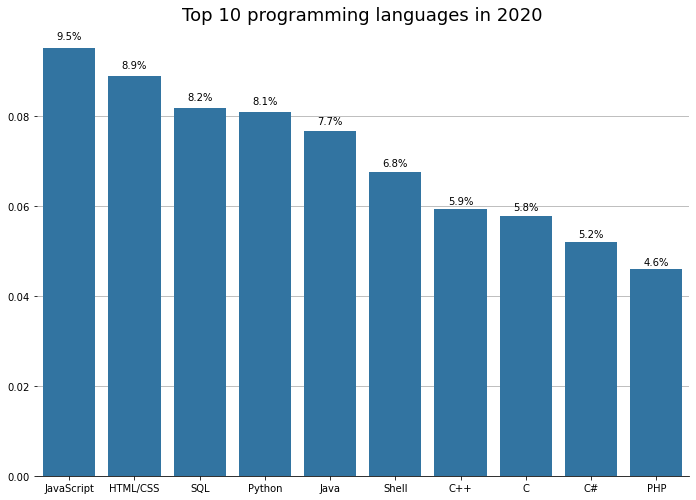

In [164]:
print_percentage_top(ratio, 10, 'Top 10 programming languages in 2020')

## Which variables influence more the salary?

In [ ]:
# Consider only numerical variables
X = df[['CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']]
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

#Four steps:

#Instantiate
lm_model = LinearRegression(normalize=True) 

#Fit - why does this break?
lm_model.fit(X_train, y_train) 

#Predict
#Score

In [158]:
df.DevType.unique()

array(['Developer, desktop or enterprise applications;Developer, full-stack',
       'Developer, full-stack;Developer, mobile', nan, ...,
       'Data scientist or machine learning specialist;Database administrator;Developer, back-end;Developer, front-end;System administrator',
       'Academic researcher;Data or business analyst;Data scientist or machine learning specialist;Database administrator;Designer;Developer, back-end;Developer, desktop or enterprise applications;Developer, embedded applications or devices;Developer, front-end;Developer, full-stack;Developer, game or graphics;Developer, mobile;Developer, QA or test;DevOps specialist;Senior executive/VP;System administrator',
       'Data or business analyst;Developer, mobile;Senior executive/VP;System administrator'],
      dtype=object)

In [ ]:
df[df['DevType'] == 'Data scientist or machine learning specialist']['LanguageWorkedWith'].value_counts()

In [ ]:
#Useful functions of the course
most_missing_cols = set(df.columns[df.isnull().mean() > 0.75]) #Provide a set of columns with more than 75% of the values missing
no_nulls = set(df.columns[df.isnull().mean()==0]) #Provide a set of columns with 0 missing values.
(ed_vals/df.shape[0]).plot(kind="bar"); # The below should be a bar chart of the proportion of individuals in your ed_vals

#Mean salaries grouped by sex and education
pd.DataFrame(df.query("Professional == 'Professional developer' and (Gender == 'Male' or Gender == 'Female')").groupby(['Gender', 'FormalEducation']).mean()['Salary'])

